# Getting summary stats from the minION

In [78]:
# Process the datasets
import pandas as pd
import os


data_dir = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/'
# First we want to map between the dataset with the LC-MS results and the raw data columns
evseq_df = pd.read_csv(f'{data_dir}ep_EVSeqL/20240422-YL.csv', index_col=0)
print(len(evseq_df))
evseq_df['Experiment'] = '20240422'
# Need to have an experiment tag as well
evseq_df['id'] = [f'{p[0]}_{p[1]}_{p[2]}' for p in evseq_df[['Experiment', 'Plate', 'Well']].values]

# First we want to map between the dataset with the LC-MS results and the raw data columns
evseq2_df = pd.read_csv(f'{data_dir}MinION parlq round2/yl-20240502.csv', index_col=0)
evseq2_df['Experiment'] = '20240502'
evseq2_df['id'] = [f'{p[0]}_{p[1]}_{p[2]}' for p in evseq2_df[['Experiment', 'Plate', 'Well']].values]
# 300-1.csv 
evseq_df = pd.concat([evseq2_df, evseq_df])
print(len(evseq_df))
# Also get all the LC-MS data
files = os.listdir(f'{data_dir}lcms-processed/')
data_df = pd.DataFrame()
for f in files:
    df = pd.read_csv(f'{data_dir}lcms-processed/{f}')
    # Make the ID based on the filename
    plate_id = f.split('.csv')[0]
    df['Plate'] = plate_id
    df['Experiment'] = '20240422'
    # Now add in the actual ID too
    df['id'] = [f'{p[0]}_{p[1]}_{p[2]}' for p in df[['Experiment', 'Plate', 'Well']].values]
    data_df = pd.concat([data_df, df])
print(len(data_df))
# Also get all the LC-MS data for the second run
files = os.listdir(f'{data_dir}MinION parlq round2/')
for f in files:
    print(f)
    if f != 'yl-20240502.csv' and '.csv' in f:
        df = pd.read_csv(f'{data_dir}MinION parlq round2/{f}')
        # Make the ID based on the filename
        plate_id = f.split('.csv')[0].replace('parlq2-', '')
        df['Plate'] = plate_id
        df['Experiment'] = '20240502'
        # Now add in the actual ID too
        df['id'] = [f'{p[0]}_{p[1]}_{p[2]}' for p in df[['Experiment', 'Plate', 'Well']].values]
        data_df = pd.concat([data_df, df])

# Join the datasets
# Set the index for both of them 
data_df.set_index('id', inplace=True)
evseq_df.set_index('id', inplace=True)
print(len(data_df))
df = evseq_df.join(data_df, how='inner', lsuffix='_data')
print(len(df))

# Save to a csv
df.to_csv(f'{data_dir}output.csv')

384
960
384
.DS_Store
parlq2-300-1.csv
parlq2-300-2.csv
parlq2-300-3.csv
yl-20240502.csv
parlq2-500-1.csv
parlq2-500-3.csv
parlq2-500-2.csv
960
960


In [79]:
1 - 539/len(df)

0.4385416666666667

In [80]:
df[df['Alignment Count'] > 100]

,barcode_plate,Plate_data,Well_data,Variant_data,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,...,Experiment_data,Well,Row,Column,Plate,cis,trans,Experiment,Variant,Normalized Activity
id,,,,,,,,,,,,,,,,,,,,,
20240502_300-1_A6,1,300-1,A6,#PARENT#,108.0,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240502,A6,A,6,300-1,572555.0332,372470.1241,20240502,NaN,NaN
20240502_300-1_A11,1,300-1,A11,#PARENT#,144.0,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240502,A11,A,11,300-1,731286.2582,529349.8409,20240502,NaN,NaN
20240502_300-1_B6,1,300-1,B6,A115G,156.0,0.980769,1.577742e-234,1.514632e-232,K39E,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240502,B6,B,6,300-1,592651.6483,424695.3553,20240502,NaN,NaN
20240502_300-1_B11,1,300-1,B11,A106G_A187G_T555C_A558G_T571G,221.0,0.948416,0.000000e+00,0.000000e+00,K36E_N63D_W191G,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240502,B11,B,11,300-1,411663.4412,322232.0768,20240502,NaN,NaN
20240502_300-1_B12,1,300-1,B12,C114T,119.0,0.924370,2.567605e-164,2.464901e-162,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240502,B12,B,12,300-1,647186.1694,486252.3249,20240502,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240422_500-1_D12,3,500-1,D12,G510A,124.0,0.959677,2.780000e-199,2.670000e-197,W170*,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240422,D12,D,12,500-1,44806.7453,52104.0684,20240422,NaN,NaN
20240422_300-2_B1,2,300-2,B1,#PARENT#,132.0,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,20240422,B1,B,1,300-2,532232.5596,577681.6171,20240422,NaN,NaN
20240422_300-2_C11,2,300-2,C11,G489DEL,149.0,0.966443,3.090000e-232,2.960000e-230,-,Deletion,...,20240422,C11,C,11,300-2,0.0000,0.0000,20240422,NaN,NaN


In [81]:
len(df[df['Alignment Count'] > 100])/len(df)

0.10520833333333333

# Get summary stats from the dataset

1. Make reference/comparison to the parent for each of the data

210 54 211 485


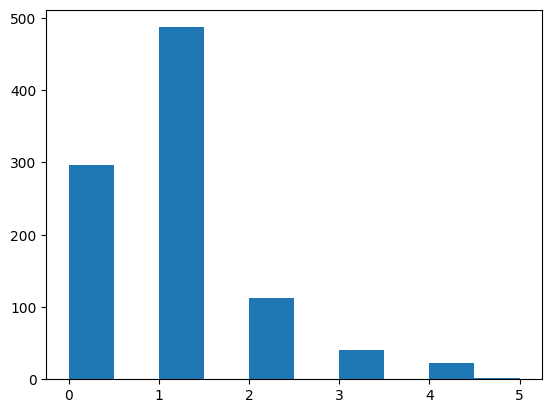

In [91]:
from sciutil import *

# Now we want to also calculate any "outliers" presumably these will be the ones with many mutations
df['# mutations'] = [len(x.split('_')) if x != '#PARENT#' else 0 for x in df['Mutations'].values]
df['trunc_label'] = ['Truncated' if '*' in v else 'OK' for v in df['aa_variant'].values]
df['trunc_label'].value_counts()
df['Variant_data'] = [v if 'DEL' not in str(v) else '#DEL#' for v in df['Variant_data'].values]
                      
plt.hist(df['# mutations'])
features = ['cis', 'trans', 'Average mutation frequency', '# mutations', 'Alignment Count']
# Normalise each of these columns 
# Let's first drop parenst # df[df['EPS'].notna()]
for f in features:
    vals = df[f].values
    df[f'{f}_norm'] = (vals - np.nanmean(vals))/(np.nanstd(vals))
    df[f'{f}_log2'] = np.log2(vals + 1)

na_df = df[df['Variant_data'] == '#N.A.#']
del_df = df[df['Variant_data'] == '#DEL#']
parent_df = df[df['Variant_data'] == '#PARENT#']
variant_df = df[~df['Variant_data'].isin(['#PARENT#', '#N.A.#', '#DEL#'])]
print(len(na_df), len(del_df), len(parent_df), len(variant_df))

In [92]:
variant_df['trunc_label'].value_counts()

trunc_label
OK           448
Truncated     37
Name: count, dtype: int64

In [93]:
parent_df['aa_variant'].values[0]

'MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALKGQVEDILDLWYGLQGSNQHLIYYFGDKSGRPIPQYLEAVRKRFGLWIIDTLCKPLDRQWLNYMYEIGLRHHRTKKGKTDGVDTVEHIPLRYMIAFIAPIGLTIKPILEKSGHPPEAVERMWAAWVKLVVLQVAIWSYPYAKTGEWLE'

# Things to check

1. What is the activity of truncated sequences
2. What is a graph of Cis and trans i.e. a scatterplot and maybe size by number of mutations.
3. What is the base activity of parents
4. Highlight the variants that are statistically above the parent threshold for each of the columns
5. For any variants that have replicates or whatever report the SD for a given mutation.
6. Classify mutations as good, nothing, and bad.



In [94]:
# Get the mean for the specific activity column
import numpy as np

col = 'cis'
mean_parent = np.nanmean(parent_df[col].values)
std_parent = np.nanstd(parent_df[col].values)
# Get the number which are 1.5 SD above the mean parent

sig_df = df[df[col] > mean_parent + 1.5*std_parent]
sig_df

,barcode_plate,Plate_data,Well_data,Variant_data,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,...,cis_norm,cis_log2,trans_norm,trans_log2,Average mutation frequency_norm,Average mutation frequency_log2,# mutations_norm,# mutations_log2,Alignment Count_norm,Alignment Count_log2
id,,,,,,,,,,,,,,,,,,,,,
20240422_300-1_A2,1,300-1,A2,#N.A.#,1.0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,2.897041,20.898312,2.014982,20.175915,NaN,NaN,0.030690,1.000000,-0.796569,1.000000
20240422_500-2_A12,4,500-2,A12,#N.A.#,1.0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,2.209144,20.628320,2.388262,20.331526,NaN,NaN,0.030690,1.000000,-0.796569,1.000000
20240422_300-1_A12,1,300-1,A12,#N.A.#,2.0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,3.536739,21.110840,2.869722,20.510248,NaN,NaN,0.030690,1.000000,-0.776921,1.584963
20240422_300-1_F3,1,300-1,F3,#N.A.#,2.0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,2.242152,20.642497,2.682579,20.443384,NaN,NaN,0.030690,1.000000,-0.776921,1.584963
20240422_300-1_E11,1,300-1,E11,#N.A.#,3.0,NaN,NaN,NaN,#N.A.#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,3.870211,21.210345,3.753982,20.790008,NaN,NaN,0.030690,1.000000,-0.757273,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240422_300-1_D7,1,300-1,D7,T69C_A311G,77.0,0.934211,4.870000e-221,4.670000e-219,Q104R,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,3.813247,21.193826,3.096572,20.587352,0.133852,0.951745,0.030690,1.000000,0.696691,6.285402
20240422_300-1_G5,1,300-1,G5,A184G_C340A,79.0,0.968354,9.290000e-243,8.920000e-241,S62G_L114I,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,2.296354,20.665479,2.171105,20.243052,0.486964,0.976990,1.121887,1.584963,0.735987,6.321928
20240422_300-1_B11,1,300-1,B11,#PARENT#,86.0,NaN,NaN,NaN,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,2.991704,20.931805,2.622549,20.421262,NaN,NaN,-1.060507,0.000000,0.873525,6.442943


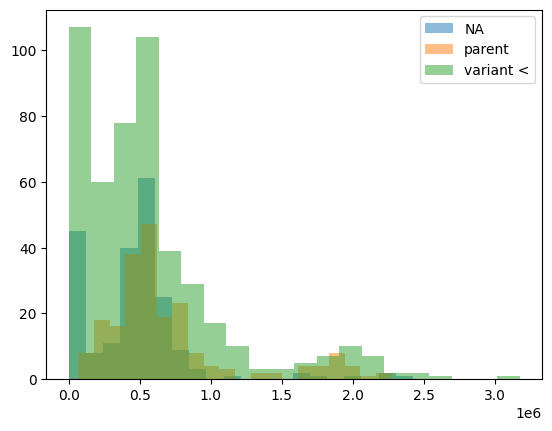

In [95]:
import matplotlib.pyplot as plt

plt.hist(na_df[col].values, label='NA', alpha=0.5, bins=20)
plt.hist(parent_df[col].values, label='parent', alpha=0.5, bins=20)
plt.hist(variant_df[col].values, label='variant <', alpha=0.5, bins=20)

# plt.hist(variant_df[variant_df[col] > mean_parent][col].values, label='variant >', alpha=0.5)
# plt.hist(variant_df[variant_df[col] < mean_parent][col].values, label='variant <', alpha=0.5)
plt.legend()


# Test with normalised 
1. Make a list of the parents that were above the threshold.

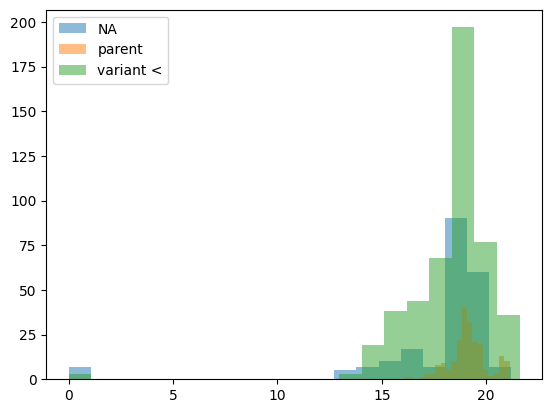

Variant_data
#N.A.#               1
G82A_T102C           1
T208C                1
A296G_C352T_A558T    1
A392G                1
T438C_A530G          1
T69C_A311G           1
Name: count, dtype: int64

In [97]:
# Get the mean for the specific activity column
import numpy as np

col = 'cis_log2'
mean_parent = np.nanmax(parent_df[col].values)
std_parent = np.nanstd(parent_df[col].values)
# Get the number which are 1.5 SD above the mean parent

plt.hist(na_df[col].values, label='NA', alpha=0.5, bins=20)
plt.hist(parent_df[col].values, label='parent', alpha=0.5, bins=20)
plt.hist(variant_df[col].values, label='variant <', alpha=0.5, bins=20)

# plt.hist(variant_df[variant_df[col] > mean_parent][col].values, label='variant >', alpha=0.5)
# plt.hist(variant_df[variant_df[col] < mean_parent][col].values, label='variant <', alpha=0.5)
plt.legend()
plt.show()

sig_df = df[df[col] > mean_parent]# + 1.5*std_parent]
sig_df['Variant_data'].value_counts()

In [101]:
# Make a label 
df['Label_Varient'] = [p if p in ['#N.A.#', '#PARENT#', '#DEL#'] else 'variant' for p in df['Variant_data'].values]

<Axes: xlabel='cis', ylabel='trans'>

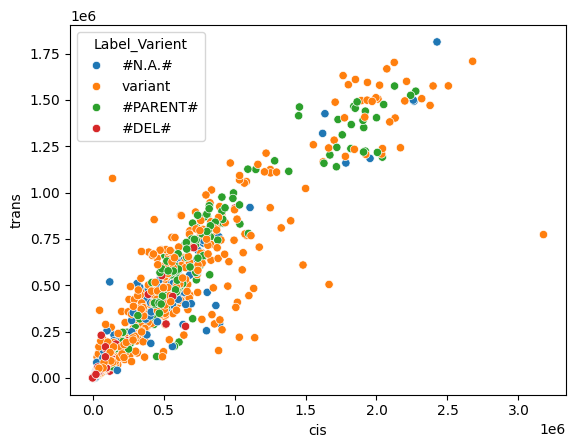

In [102]:
import seaborn as sns

sns.scatterplot(df, x='cis', y='trans', hue='Label_Varient')

<Axes: xlabel='cis_log2', ylabel='trans_log2'>

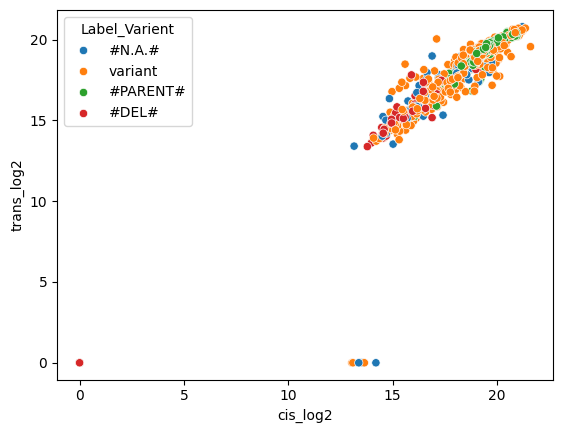

In [103]:
sns.scatterplot(df, x='cis_log2', y='trans_log2', hue='Label_Varient')

<Axes: xlabel='cis_norm', ylabel='trans_norm'>

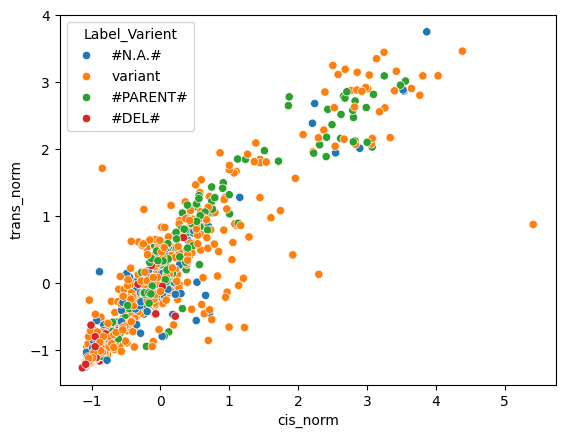

In [104]:
sns.scatterplot(df, x='cis_norm', y='trans_norm', hue='Label_Varient')

# Identify sequences with truncation

<Axes: xlabel='cis_norm', ylabel='trans_norm'>

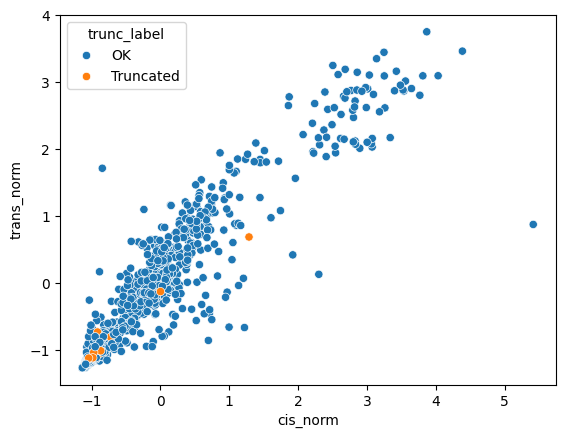

In [105]:
sns.scatterplot(df, x='cis_norm', y='trans_norm', hue='trunc_label')

<Axes: xlabel='cis_norm', ylabel='trans_norm'>

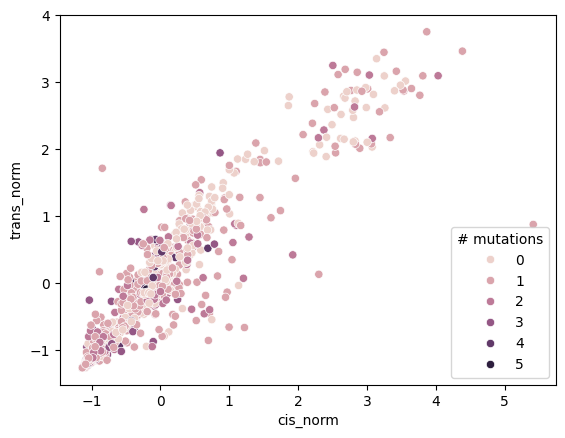

In [106]:
sns.scatterplot(df, x='cis_norm', y='trans_norm', hue='# mutations')

# Colour by the type of mutation

In [111]:
variant_df

,barcode_plate,Plate_data,Well_data,Variant_data,Alignment Count,Average mutation frequency,P value,P adj. value,Mutations,nc_variant,...,cis_log2,trans_norm,trans_log2,Average mutation frequency_norm,Average mutation frequency_log2,# mutations_norm,# mutations_log2,Alignment Count_norm,Alignment Count_log2,single_var
id,,,,,,,,,,,,,,,,,,,,,
20240502_300-1_A4,1,300-1,A4,T163C,57.0,0.929825,2.096405e-78,2.012549e-76,#PARENT#,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,17.963716,-0.861983,17.143161,0.088493,0.948470,-1.060507,0.000000,0.303728,5.857981,C
20240502_300-1_A5,1,300-1,A5,T124C_G269T_G369T_G519C,84.0,0.976190,0.000000e+00,0.000000e+00,C42R_G90V_K123N_L173F,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,16.138942,-1.108020,15.768534,0.568004,0.982722,3.304282,2.321928,0.834228,6.409391,C
20240502_300-1_A7,1,300-1,A7,C5T_C279T,23.0,0.956522,7.947366e-62,7.629471e-60,A2V,ATGGTGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,19.384468,-0.022925,18.773150,0.364592,0.968291,0.030690,1.000000,-0.364310,4.584963,T
20240502_300-1_A8,1,300-1,A8,T422C,29.0,1.000000,2.537622e-42,2.436117e-40,F141S,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,19.681726,-0.317894,18.381078,0.814239,1.000000,0.030690,1.000000,-0.246421,4.906891,C
20240502_300-1_A12,1,300-1,A12,A79G,41.0,0.975610,3.046125e-59,2.924280e-57,T27A,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,19.861240,0.107919,18.917925,0.561998,0.982298,0.030690,1.000000,-0.010643,5.392317,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240422_300-2_A3,2,300-2,A3,T302C,115.0,0.982609,2.130000e-188,2.040000e-186,L101P,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,17.756068,-0.957585,16.749670,0.634380,0.987400,0.030690,1.000000,1.443321,6.857981,C
20240422_300-2_D12,2,300-2,D12,T302A_G573A,115.0,0.978070,0.000000e+00,0.000000e+00,L101Q_W191*,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,19.070551,-0.124543,18.649747,0.587443,0.984094,1.121887,1.584963,1.443321,6.857981,A
20240422_500-1_H2,3,500-1,H2,T571C,118.0,0.974576,4.630000e-186,4.440000e-184,W191R,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,...,19.138029,0.531813,19.306747,0.551310,0.981543,0.030690,1.000000,1.502266,6.894818,C


In [113]:
single_variant_df = variant_df[variant_df['Mutations'].notna()]
single_variant_df = single_variant_df[single_variant_df['# mutations'] < 2]
single_variant_df['single_var'] = [c[-1] for c in single_variant_df['Mutations'].values]
single_variant_df['single_var'].value_counts()

single_var
#    64
V    24
R    24
A    18
G    18
T    17
S    15
L    15
E    14
*    13
C     8
I     8
N     8
K     8
D     7
Q     7
P     6
H     5
F     5
W     1
Y     1
M     1
Name: count, dtype: int64

In [116]:
amino_acids = {
    'G': ('Non-polar, aliphatic', '#FF0D0D'),  # Red
    'A': ('Non-polar, aliphatic', '#FF8E15'),  # Orange
    'P': ('Non-polar, aliphatic', '#FFEA00'),  # Yellow
    'V': ('Non-polar, aliphatic', '#BDFF00'),  # Light green
    'L': ('Non-polar, aliphatic', '#85E21F'),  # Green
    'I': ('Non-polar, aliphatic', '#4E9A06'),  # Dark green
    
    'F': ('Aromatic', '#8F00FF'),  # Violet
    'Y': ('Aromatic', '#CC00FF'),  # Purple
    'W': ('Aromatic', '#5800FF'),  # Deep purple
    
    'S': ('Polar, uncharged', '#00FFFF'),  # Cyan
    'T': ('Polar, uncharged', '#A0D6B4'),  # Light blue-green
    'C': ('Polar, uncharged', '#0000FF'),  # Blue
    'M': ('Polar, uncharged', '#643EBF'),  # Indigo
    'N': ('Polar, uncharged', '#728FCE'),  # Slate blue
    'Q': ('Polar, uncharged', '#65AB7C'),  # Spring green
    
    'K': ('Positively charged', '#D462FF'),  # Light purple
    'R': ('Positively charged', '#BF77F6'),  # Lavender
    'H': ('Positively charged', '#8B00FF'),  # Dark violet
    
    'D': ('Negatively charged', '#FF0000'),  # Bright red
    'E': ('Negatively charged', '#900000')   # Dark red
}
single_variant_df['colour'] = [amino_acids.get(c)[0] if amino_acids.get(c) else 'Parent' for c in single_variant_df['single_var'].values]


<Axes: xlabel='cis_norm', ylabel='trans_norm'>

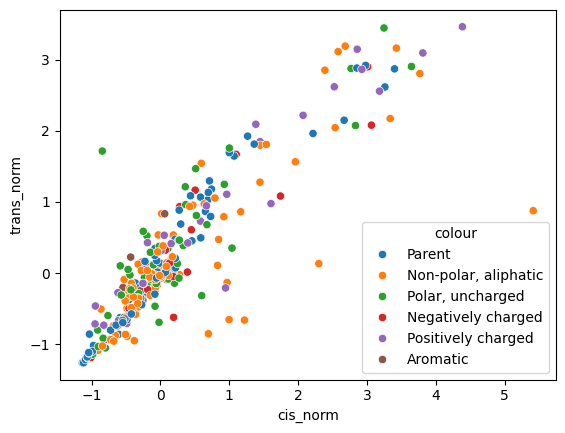

In [117]:
sns.scatterplot(single_variant_df, x='cis_norm', y='trans_norm', hue='colour')